In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import os

warnings.filterwarnings('ignore')

## Read Train data

In [3]:
train_home_team_statistics_df = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Train_Data/train_away_team_statistics_df.csv', index_col=0)

train_scores = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Y_train_1rknArQ.csv', index_col=0)

train_home = train_home_team_statistics_df.iloc[:,2:]
train_away = train_away_team_statistics_df.iloc[:,2:]

train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

train_data =  pd.concat([train_home,train_away],join='inner',axis=1)
train_scores = train_scores.loc[train_data.index]

train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan})


In [4]:
train_home_team_statistics_df.head()

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [5]:
train_scores.head()

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


## Benchmark

We try to model if AWAY wins

In [6]:
train_new_y = train_scores['AWAY_WINS']

### train, valid test split

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)

### xgb model

In [8]:
params_1 = {
    'booster': 'gbtree',
    'tree_method':'hist',
    'max_depth': 8, 
    'learning_rate': 0.025,
    'objective': 'multi:softprob',
    'num_class': 2,
    'eval_metric':'mlogloss'
    }


d_train = xgb.DMatrix(X_train.replace({0:np.nan}), y_train)
d_valid = xgb.DMatrix(X_valid.replace({0:np.nan}), y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]

bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)

[0]	train-mlogloss:0.68338	eval-mlogloss:0.68785
[1]	train-mlogloss:0.67389	eval-mlogloss:0.68266
[2]	train-mlogloss:0.66467	eval-mlogloss:0.67757
[3]	train-mlogloss:0.65574	eval-mlogloss:0.67304
[4]	train-mlogloss:0.64724	eval-mlogloss:0.66849
[5]	train-mlogloss:0.63894	eval-mlogloss:0.66438
[6]	train-mlogloss:0.63052	eval-mlogloss:0.66062
[7]	train-mlogloss:0.62230	eval-mlogloss:0.65697
[8]	train-mlogloss:0.61454	eval-mlogloss:0.65359
[9]	train-mlogloss:0.60701	eval-mlogloss:0.65015
[10]	train-mlogloss:0.59949	eval-mlogloss:0.64682
[11]	train-mlogloss:0.59224	eval-mlogloss:0.64347
[12]	train-mlogloss:0.58520	eval-mlogloss:0.64026
[13]	train-mlogloss:0.57876	eval-mlogloss:0.63741
[14]	train-mlogloss:0.57188	eval-mlogloss:0.63467
[15]	train-mlogloss:0.56536	eval-mlogloss:0.63191
[16]	train-mlogloss:0.55888	eval-mlogloss:0.62946
[17]	train-mlogloss:0.55254	eval-mlogloss:0.62681
[18]	train-mlogloss:0.54669	eval-mlogloss:0.62444
[19]	train-mlogloss:0.54078	eval-mlogloss:0.62231
[20]	train

### Some analysis

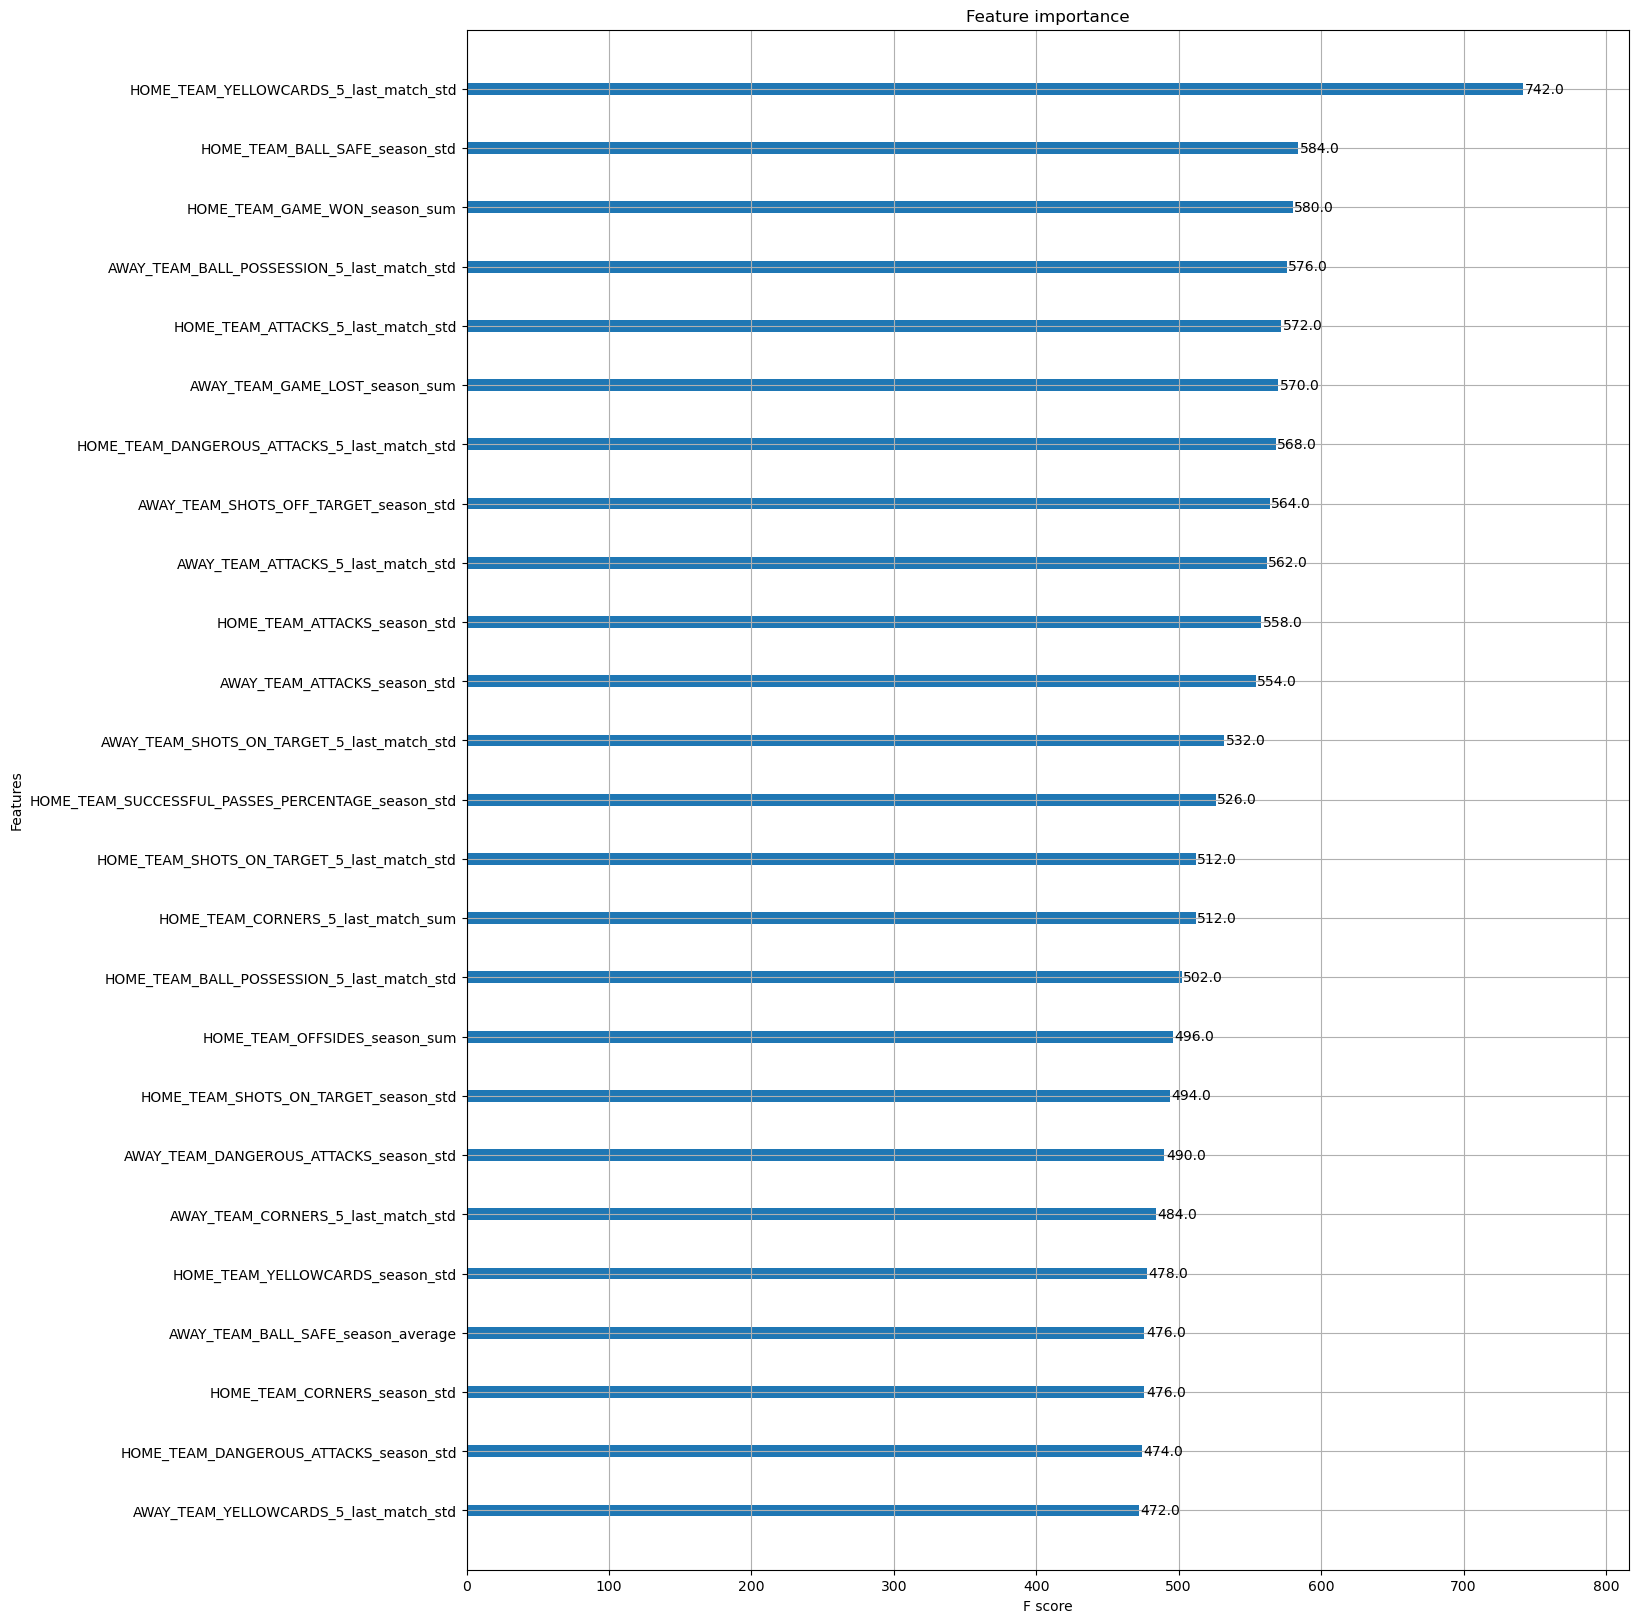

In [9]:
xgb.plot_importance(bst, max_num_features=25)
fig = plt.gcf()
fig.set_size_inches(15, 20)

### Accuracy on test set

A simple benchmark is always predicting home wins

In [10]:
target = train_scores.loc[X_test.index].copy()

home_wins = target
home_wins = 0 * home_wins
home_wins.iloc[:,0] = 1

np.round(accuracy_score(home_wins,target),4)

0.4401

Using our model

In [11]:
X_test_xgb = xgb.DMatrix(X_test)

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int).values
np.round(accuracy_score(predictions,target),4)

0.4742

## Submission

In [12]:
test_home = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)

In [13]:
X_bench = xgb.DMatrix(test_data)

predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv('./benchmark_submission.csv', index=False)

# Data exploration :

In [14]:
import seaborn as sns

In [15]:
train_home["target"] = train_scores["HOME_WINS"] - train_scores["AWAY_WINS"]

In [16]:
# Extract features and target
features = train_home.iloc[:, :-4]  # All columns except the last one
target = train_home.iloc[:,-1]    # Last column

# Compute correlations between features and target
correlations = features.corrwith(target)
correlations_sgn = features.corrwith(target)

# Sort correlations by absolute values
correlations = correlations.abs().sort_values(ascending=False)

# Print the top N features with highest absolute correlation values
N = 6  # Change this value to select top N features
top_features = correlations.head(N)
print("Top", N, "features with highest absolute correlation with the target:")
print(top_features)

top_features = top_features.index.to_list()

Top 6 features with highest absolute correlation with the target:
HOME_TEAM_SHOTS_INSIDEBOX_season_average    0.201376
HOME_TEAM_SHOTS_INSIDEBOX_season_sum        0.195088
HOME_TEAM_GAME_WON_season_sum               0.185835
HOME_TEAM_GAME_WON_season_average           0.185039
HOME_TEAM_SHOTS_ON_TARGET_season_average    0.180909
HOME_TEAM_SHOTS_TOTAL_season_average        0.180425
dtype: float64


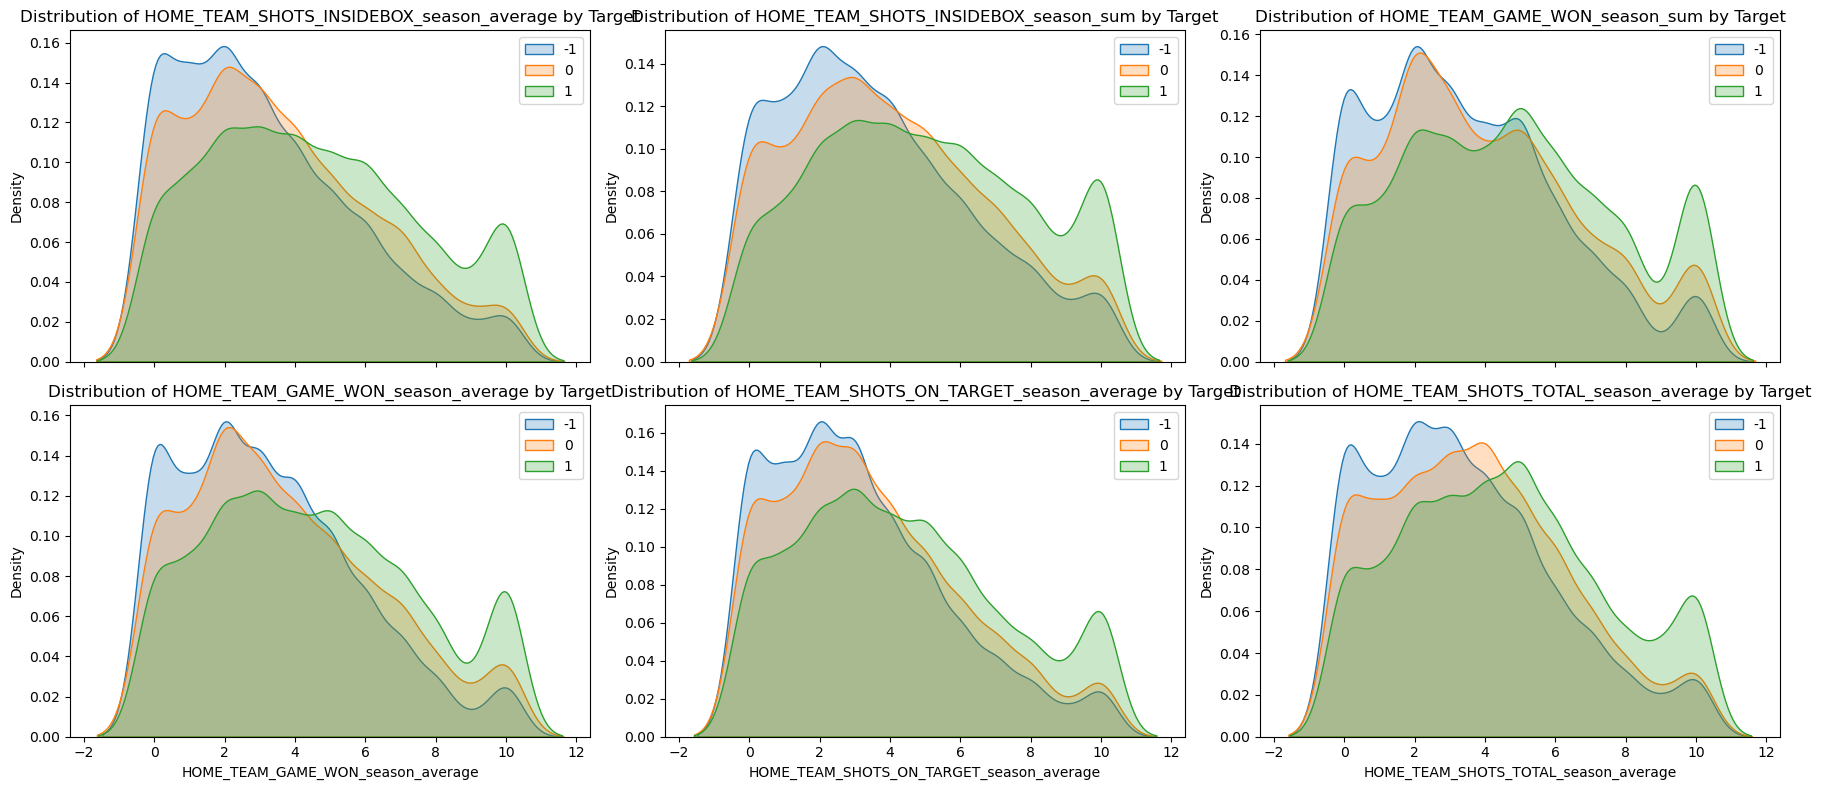

In [17]:
# Create a single figure and multiple axes
fig, axs = plt.subplots(2, len(top_features) // 3 + 1, figsize=(18, 8), sharex=True)

# Flatten the axs array for easier indexing
axs = axs.flatten()

palette = sns.color_palette("tab10", 3)

# Plot distributions of other columns in function of 'target'
for idx, column in enumerate(top_features):  # Exclude the 'target' column
    for i, category in enumerate(train_home['target'].unique()):
        sns.kdeplot(data=train_home[train_home['target'] == category][column], color=palette[i], label=category, fill=True, ax=axs[idx])
    axs[idx].set_title(f'Distribution of {column} by Target')
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel('Density')
    axs[idx].legend()

plt.tight_layout()
plt.show()

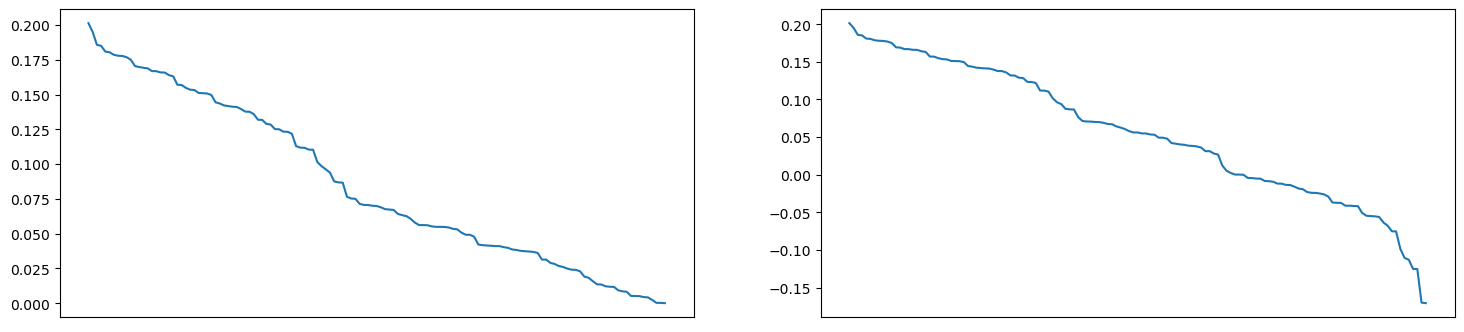

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(18, 4), sharex=True)
correlations.plot(xticks=[],ax = axs[0] )
correlations_sgn.sort_values(ascending=False).plot(xticks=[], ax = axs[1])
plt.show()

 - We are going to select only the features that have high correlation with the results and that are not correlated to each other
 - Then we are going to do the difference between some of them
 - Then we are going to use them for the prediction using a simple logistic regression

### First selection by high correlation:

In [19]:
# We are going to store the features with the highest correlation
Important_features = correlations.index[correlations.values > 0.17].values

### Second selection by clustering:

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# Step 1: Calculate correlation matrix
correlation_matrix = train_home.corr().abs()

# Step 2: Perform hierarchical clustering
distance_matrix = pairwise_distances(correlation_matrix, metric='euclidean')
model = AgglomerativeClustering(n_clusters=10, linkage='ward')
model.fit(distance_matrix)
cluster_labels = model.labels_

# Step 3: Identify representative columns from each cluster
cluster_representatives = []
for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_correlations = correlation_matrix.iloc[cluster_indices, cluster_indices]
    min_corr_index = cluster_correlations.sum(axis=1).idxmin()
    cluster_representatives.append(min_corr_index)

# Step 4: Keep only representative columns in the DataFrame
data_filtered = train_home[cluster_representatives]
new_features = data_filtered.columns

In [21]:
new_features

Index(['HOME_TEAM_ATTACKS_5_last_match_sum',
       'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std',
       'HOME_TEAM_BALL_POSSESSION_5_last_match_std',
       'HOME_TEAM_ATTACKS_5_last_match_std',
       'HOME_TEAM_BALL_POSSESSION_5_last_match_average',
       'HOME_TEAM_GAME_LOST_season_sum', 'HOME_TEAM_SUBSTITUTIONS_season_std',
       'HOME_TEAM_PENALTIES_season_std', 'HOME_TEAM_SAVES_5_last_match_std',
       'HOME_TEAM_REDCARDS_season_std'],
      dtype='object')

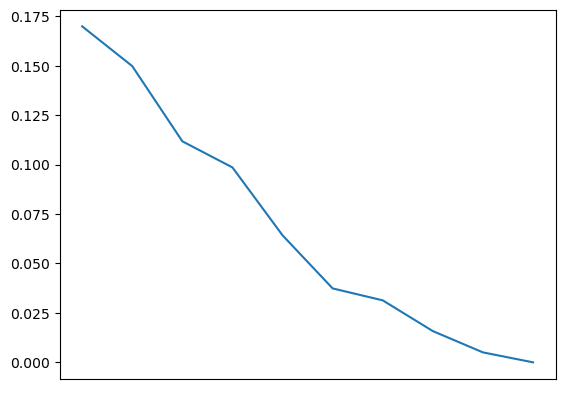

In [22]:
# Compute correlations between new features and target
correlations2 = train_data[new_features].corrwith(target)

# Sort correlations by absolute values
correlations2 = correlations2.abs().sort_values(ascending=False)
correlations2.plot(xticks=[], )

new_features = correlations2.index[correlations2.values > 0.025].values

plt.show()

In [23]:
len(set(new_features))

7

In [24]:
print("Before adding new features", len(Important_features))
Important_features = set(Important_features).union(set(new_features))
print("After adding new features",len(Important_features))

Before adding new features 12
After adding new features 19


In [25]:
set(Important_features)

{'HOME_TEAM_ATTACKS_5_last_match_std',
 'HOME_TEAM_ATTACKS_5_last_match_sum',
 'HOME_TEAM_BALL_POSSESSION_5_last_match_average',
 'HOME_TEAM_BALL_POSSESSION_season_average',
 'HOME_TEAM_GAME_LOST_season_average',
 'HOME_TEAM_GAME_LOST_season_sum',
 'HOME_TEAM_GAME_WON_season_average',
 'HOME_TEAM_GAME_WON_season_sum',
 'HOME_TEAM_GOALS_season_average',
 'HOME_TEAM_GOALS_season_sum',
 'HOME_TEAM_PENALTIES_season_std',
 'HOME_TEAM_SAVES_5_last_match_std',
 'HOME_TEAM_SHOTS_INSIDEBOX_season_average',
 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum',
 'HOME_TEAM_SHOTS_ON_TARGET_season_average',
 'HOME_TEAM_SHOTS_ON_TARGET_season_sum',
 'HOME_TEAM_SHOTS_TOTAL_season_average',
 'HOME_TEAM_SHOTS_TOTAL_season_sum',
 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std'}

- Now we know what columns we are going to keep, 
- I do the hypothesis that the important matter is the relative difference in these metrcis to get the prediction

In [26]:
Important_features2 = ['AWAY' + x[4:] for x in Important_features] 

In [27]:
def get_important_features(df):
    for feat1, feat2 in zip(sorted(Important_features),sorted(Important_features2)):
        df[f'DIFF_{feat1[4:]}'] = df[f'{feat1}'] - df[f'{feat2}']
    # Filter columns by prefix
    df = df[df.columns[df.columns.str.startswith('DIFF')]]
    return df

exemple = get_important_features(train_data)


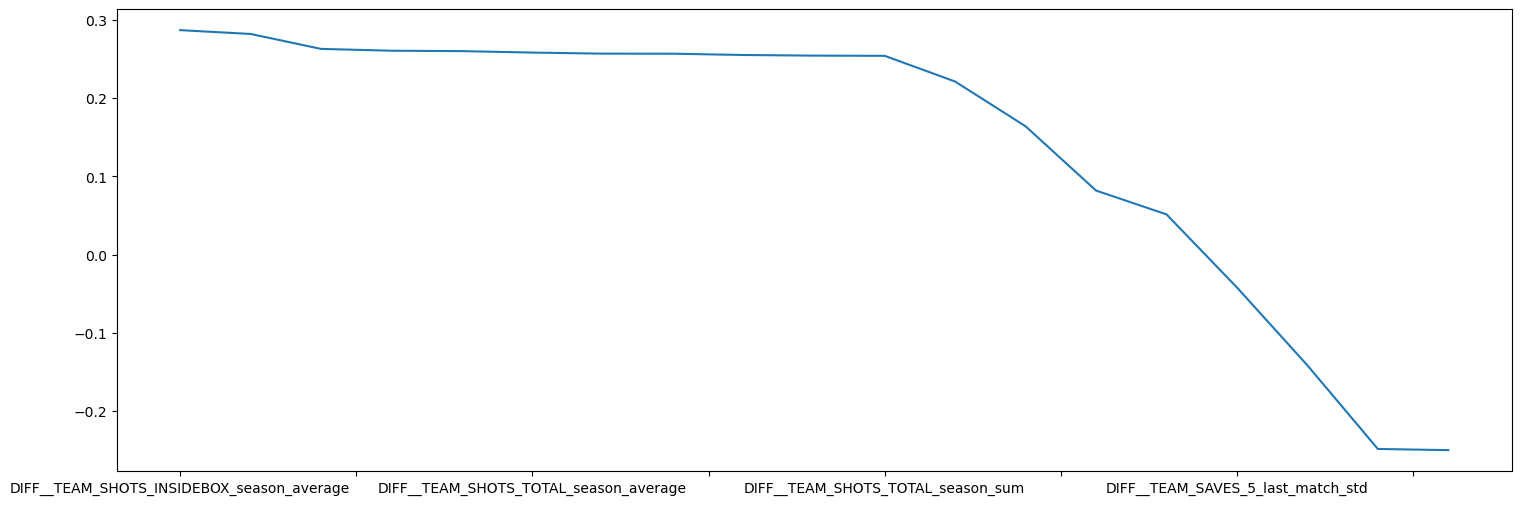

In [28]:
new_corr = exemple.corrwith(target)
new_corr = new_corr.sort_values(ascending=False)
new_corr.plot(x = new_corr.index, y = new_corr.values, figsize = (18,6))
plt.show()

### Creation of the logistic regression :

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = get_important_features(train_data)
train_scores2 = train_scores.copy()
train_scores2['target'] = train_scores2['HOME_WINS'] - train_scores2['AWAY_WINS']
Y = train_scores2[['target']]

# Replace NaN values with 0
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5142160844841592


In [30]:
def create_results(arr):
    df = pd.DataFrame(columns=['HOME_WINS', 'DRAW', 'AWAY_WINS'])
    for i, ele in enumerate(arr):
        df.at[i,'HOME_WINS'] = 1 if ele == 1 else 0
        df.at[i,'DRAW'] = 1 if ele == 0 else 0
        df.at[i,'AWAY_WINS'] = 1 if ele == -1 else 0
    return df

## NEW Submission

In [31]:
test_home = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)

X_final = get_important_features(test_data)

# Replace NaN values with 0
X_final.fillna(0, inplace=True)

predictions = model.predict(X_final)
predictions = create_results(predictions)

predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv('./Badre_submission.csv', index=False)